In [3]:
library(anytime)
library(tidyverse)

#loading databases into dataframes
a <- read.csv("/Users/amandeepverma/Downloads/Data_Analytics/midterm_proj/IBM.csv",stringsAsFactors = FALSE)
b <- read.csv("/Users/amandeepverma/Downloads/Data_Analytics/midterm_proj/MSFT.csv")
c <- read.csv("/Users/amandeepverma/Downloads/Data_Analytics/midterm_proj/GOOG.csv")
d <- read.csv("/Users/amandeepverma/Downloads/Data_Analytics/midterm_proj/AAPL.csv")
e <- read.csv("/Users/amandeepverma/Downloads/Data_Analytics/midterm_proj/AMZN.csv")
f <- read.csv("/Users/amandeepverma/Downloads/Data_Analytics/midterm_proj/FB.csv")
g <- read.csv("/Users/amandeepverma/Downloads/Data_Analytics/midterm_proj/NFLX.csv")
h <- read.csv("/Users/amandeepverma/Downloads/Data_Analytics/midterm_proj/TSLA.csv")
i <- read.csv("/Users/amandeepverma/Downloads/Data_Analytics/midterm_proj/ORCL.csv")
j <- read.csv("/Users/amandeepverma/Downloads/Data_Analytics/midterm_proj/SAP.csv")

#loading databases of YenDollarConversionRate
data.frame <- read.csv("/Users/amandeepverma/Downloads/Data_Analytics/midterm_proj/YenDollar.csv",stringsAsFactors = FALSE)
Yen <- data.frame[c("Date", "Close")]


#loading the specific columns from database 
IBM <- a[,c("Date","Close","Adj.Close")]
MSFT <- b[,c("Close","Adj.Close")]
GOOG <- c[, c("Close","Adj.Close")]
AAPL <- d[, c("Close","Adj.Close")]
AMZN <- e[, c("Close","Adj.Close")]
FB <- f[, c("Close","Adj.Close")]
NFLX <- g[, c("Close","Adj.Close")]
TSLA <- h[, c("Close","Adj.Close")]
ORCL <- i[, c("Close","Adj.Close")]
SAP <- j[, c("Close","Adj.Close")]

#changing column names to relevant names
colnames(IBM)=c('Date', 'IBM Close', 'IBM Adj.Close')
colnames(MSFT)=c( 'MSFT Close', 'MSFT Adj.Close')
colnames(GOOG)=c('GOOG Close', 'GOOG Adj.Close')
colnames(AAPL)=c('AAPL Close', 'AAPL Adj.Close')
colnames(AMZN)=c('AMZN Close', 'AMZN Adj.Close')
colnames(FB)=c('FB Close', 'FB Adj.Close')
colnames(NFLX)=c('NFLX Close', 'NFLX Adj.Close')
colnames(TSLA)=c('TSLA Close', 'TSLA Adj.Close')
colnames(ORCL)=c('ORCL Close', 'ORCL Adj.Close')
colnames(SAP)=c('SAP Close', 'SAP Adj.Close')

StockData <- data.frame(IBM, MSFT, GOOG, AAPL, AMZN, FB, NFLX, TSLA, ORCL, SAP); 
head(StockData)

,Date,IBM.Close,IBM.Adj.Close,MSFT.Close,MSFT.Adj.Close,GOOG.Close,GOOG.Adj.Close,AAPL.Close,AAPL.Adj.Close,AMZN.Close,⋯,FB.Close,FB.Adj.Close,NFLX.Close,NFLX.Adj.Close,TSLA.Close,TSLA.Adj.Close,ORCL.Close,ORCL.Adj.Close,SAP.Close,SAP.Adj.Close
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2018-01-02,154.25,139.3655,85.95,83.25638,1065.00,1065.00,172.26,166.8040,1189.01,⋯,181.42,181.42,201.07,201.07,320.53,320.53,46.63,44.92264,112.39,109.2076
2,2018-01-03,158.49,143.1963,86.35,83.64384,1082.48,1082.48,172.23,166.7750,1204.20,⋯,184.67,184.67,205.05,205.05,317.25,317.25,47.71,45.96309,113.31,110.1015
3,2018-01-04,161.70,146.0966,87.11,84.38003,1086.40,1086.40,173.03,167.5496,1209.59,⋯,184.33,184.33,205.63,205.63,314.62,314.62,48.18,46.41589,115.05,111.7923
4,2018-01-05,162.49,146.8103,88.19,85.42618,1102.23,1102.23,175.00,169.4572,1229.14,⋯,186.85,186.85,209.99,209.99,316.58,316.58,48.47,46.69527,116.33,113.0360
5,2018-01-08,163.47,147.6958,88.28,85.51336,1106.94,1106.94,174.35,168.8278,1246.87,⋯,188.28,188.28,212.05,212.05,336.41,336.41,48.98,47.18660,114.80,111.5493
6,2018-01-09,163.83,148.0210,88.22,85.45524,1106.26,1106.26,174.33,168.8085,1252.70,⋯,187.87,187.87,209.31,209.31,333.69,333.69,49.06,47.44772,114.16,110.9275


In [4]:
#Cash= 5million to start investing. Cash always stays in zero interest cash account.
Cash=5000000
#StockValueWeHold = sum of (for each share(NumberOfShare*SharePrice))
StockValue=0
# Mark to Market Value
MTM = Cash + StockValue
#days rebalancing stragegy 
DaysIncrementor =5
#Cash to spend on Each Share
CashEachShare=Cash/DaysIncrementor;

#Shares to Buy, Initial Catalog
BuyCatalog=c("IBM","MSFT","GOOG","AAPL","AMZN")

#dataframe to store Portfolio
Portfolio<-data.frame(matrix(ncol = 4),stringsAsFactors = FALSE)
X <- c("PurchaseDate","Company","Volume","PurchasePrice")
colnames(Portfolio) <- X

#temporary vectors
PurchaseDateT=c();
CompanyT=c();
VolumeT=c();
PurchasePriceT=c();

#initilizer to start row in StockData
Current_Row=1

#temporary vectors for percentage change 
MTMT=c();
MTMPCT=c();

In [5]:
#function to calculate the percent change
PercentageChange<- function(a,b)
    {
    ((b-a)/a)*100
}

In [6]:
#function to reset all vairables to default
#you would use it if you want to again run the portfoliorunnerfunction
reset<-function()
    {
    Cash<<-5000000
    StockValue<<-0
    MTM <<- Cash + StockValue
    DaysIncrementor <<-5
    CashEachShare<<-Cash/DaysIncrementor;
    BuyCatalog<<-c("IBM","MSFT","GOOG","AAPL","AMZN")
    Portfolio<<-Portfolio[0,]
    PurchaseDateT<<-c();
    CompanyT<<-c();
    VolumeT<<-c();
    PurchasePriceT<<-c();
    Current_Row <<- 1
    
}

In [7]:
#Function to update the MTM,Cash, StockValue
updateMTM<-function()
    {
    TotalShareValue=0
    for(i in 1:length(Portfolio$PurchaseDate))
        {
        TotalShareValue=TotalShareValue+Portfolio$Volume[i]*Portfolio$PurchasePrice[i]
    }
    StockValue<<-TotalShareValue
    Cash<<-Cash-TotalShareValue
    MTM<<-StockValue+Cash
}

In [8]:
#Function to update Portfolio and add all the new bought shares into portfolio
updatePortfolio<-function()
    {
    Portfolio<<-cbind.data.frame(PurchaseDate=PurchaseDateT,Company=CompanyT,Volume=VolumeT,PurchasePrice=PurchasePriceT,stringsAsFactors = FALSE)
    
}

In [9]:
#Function to output the number of share you can buy on specific date, cash and share name as parameter

QuantityYouGet <- function(DateToBuy,CashToBuy,ShareName,i){
    #Joining ShareName+".Close" so as ColumnName can refer in dataframe StockData 
    ColumnName=paste0(ShareName,".Close")
    
    ShareClosingPrice= StockData[StockData$Date == DateToBuy,ColumnName ]
    
    #floor value of the (cash/price)
    NumberOfShares=floor(CashToBuy/ShareClosingPrice)
    
    PurchaseDateT[i]<<-DateToBuy;
    CompanyT[i]<<-ShareName;
    VolumeT[i]<<-NumberOfShares;
    PurchasePriceT[i]<<-ShareClosingPrice;
    
    #Portfolio<<- rbind(Portfolio,c(DateToBuy,ShareName,NumberOfShares,ShareClosingPrice))
}
     


In [10]:
#Function to buy the shares in vector BuyCatalog
buy<-function(DateToBuy)
    {
    for(i in 1:length(BuyCatalog))
        {
            (QuantityYouGet(DateToBuy,CashEachShare,BuyCatalog[i],i))
        }
    updatePortfolio()
    updateMTM()
}


In [11]:
#Function to caluculate the percentage drop of AdjClose Price
PerAdjCloseDrop<-function(D1,D2,column_name){  
    x1=StockData[StockData$Date == D1 ,c(column_name)]
    x2=StockData[StockData$Date == D2 ,c(column_name)]
    ((x2-x1)/x1)*100
}

In [12]:
#Function to Update The BuyCatalog as per strategy of rebalancing of buying high or buying low
UpdateBuyCatalog<-function(Current_Row,BuyStrategy,DaysIncrementor)
    {
    Current_Date=StockData$Date[Current_Row]
    Last_Date=StockData$Date[Current_Row-DaysIncrementor]
    share = c("IBM", "MSFT", "GOOG", "AAPL", "AMZN", "FB", "NFLX", "TSLA", "ORCL", "SAP");
    percent = c(PerAdjCloseDrop(Last_Date,Current_Date, "IBM.Adj.Close"),PerAdjCloseDrop(Last_Date,Current_Date, "MSFT.Adj.Close"),PerAdjCloseDrop(Last_Date,Current_Date, "GOOG.Adj.Close"),PerAdjCloseDrop(Last_Date,Current_Date, "AAPL.Adj.Close"),PerAdjCloseDrop(Last_Date,Current_Date, "AMZN.Adj.Close"),PerAdjCloseDrop(Last_Date,Current_Date, "FB.Adj.Close"),PerAdjCloseDrop(Last_Date,Current_Date, "NFLX.Adj.Close"),PerAdjCloseDrop(Last_Date,Current_Date, "TSLA.Adj.Close"),PerAdjCloseDrop(Last_Date,Current_Date, "ORCL.Adj.Close"),PerAdjCloseDrop(Last_Date,Current_Date, "SAP.Adj.Close"))
    DF <- data.frame(share, percent,stringsAsFactors = FALSE) 
    if(BuyStrategy=="buying_low")
        {
        DF <- DF[order(DF$percent),]
    }
    else
        {
        DF <- DF[order(DF$percent,decreasing = TRUE),]
    }
    BuyCatalog<<-DF$share[1:5]
}

In [13]:
#Function to sell all the shares in the portfolio and update the MTM,Cash, StockValue
SellAllShares<-function(Current_Row)
    {
    Current_Date=StockData$Date[Current_Row]
    
    TotalShareValue=0
    for(i in 1:length(Portfolio$PurchaseDate))
        {
        curr_column = paste0(Portfolio$Company[i], ".Close")
        Current_Price= StockData[StockData$Date==Current_Date, curr_column]
        TotalShareValue=TotalShareValue+Portfolio$Volume[i]*Current_Price
    }
    Cash<<-Cash+TotalShareValue
    StockValue<<-0
    MTM<<-StockValue+Cash
    
}

In [14]:
#Function to Calculate the Divident
DividentCalculator= function(name,i)
    {
    close = paste0(name, ".Close")
    AdjClose = paste0(name, ".Adj.Close")
    
    (((StockData[i-1,close]/StockData[i,close]) - (StockData[i-1,AdjClose]/StockData[i,AdjClose]))*  StockData[i,close]  )

}

In [15]:
#Function to Update Divident and add the divident to Cash
UpdateDivident<-function(Current_Row)
    {
    for(i in (Current_Row-(DaysIncrementor-1)):Current_Row)
        {
        for(j in 1:length(Portfolio$PurchaseDate))
            {
            
            name=Portfolio$Company[j]
            Divident= DividentCalculator(name,i )
            if(Divident>0.1)
                {
                #The Printable lines here can be uncommented 
                #The print lines will show up if Divident occurs, while running the portfolio function
                
                #print("--------------------------------------------------------------------------------")
                DividentAmount=Divident* Portfolio$Volume[j]
                #print(paste("name= ",name))
                #print(paste("Cash Before= ",Cash))
                #print(paste("DividentAAmount= ",DividentAmount))
                Cash<<-Cash+DividentAmount
                #print(paste("Cash After= ",Cash))
                #print("--------------------------------------------------------------------------------")
            }
            #StockData
        }
    }
}

In [16]:
#This function helps in finding Daily MTM
DailyMTMCalculator<- function(index,DaysIncrementor)
    {
    
    StockValueT=c((1:(DaysIncrementor-1)*0))
    for(i in 1:length(Portfolio$PurchaseDate))
        {
        
        col_name= paste0(Portfolio$Company[i], ".Close")
        
        for(j in 1:(DaysIncrementor-1))
            {
            StockValueT[j]= StockValueT[j] + StockData[index-DaysIncrementor+j,col_name]*Portfolio$Volume[i]
        }
        
    }
    for(j in 1:(DaysIncrementor-1))
        {
        MTMT[index-DaysIncrementor+j]<<-StockValueT[j]+Cash
    }
    
    for(j in 1:(DaysIncrementor-1))
        {
        MTMPCT[index-DaysIncrementor+j]<<-PercentageChange(MTMT[index-DaysIncrementor+j-1],MTMT[index-DaysIncrementor+j])
    }
    
    
}

In [17]:
#Main function to run run all the functions of portfolio. The Current_Row Paramenter keeps changing with the incrementor
#DaysIncrementor refers to number of days for rebalancing,BuyStrategy refers to high or low buy strategy 
PortfolioRunner <- function(Current_Row,DaysIncrementor,BuyStrategy)
{
    
    DateToBuy=StockData$Date[Current_Row]
    
    if(DateToBuy=="2018-01-02")
        {
        
        MTMPCT[Current_Row]<<-0
        
        buy(DateToBuy)  
        MTMT[Current_Row]<<-MTM
    }
     else{
         #
         UpdateDivident(Current_Row)
         
         #Find5MostDroppedAdjacentClose and Updates the catalog
         UpdateBuyCatalog(Current_Row,BuyStrategy,DaysIncrementor)
         if(DaysIncrementor>1)
            {
             DailyMTMCalculator(Current_Row,DaysIncrementor)
             }
         
         SellAllShares(Current_Row)
         #empties the portfolio
         Portfolio<<-Portfolio[0,]
         #for next purchase
         CashEachShare<<-Cash/5;
         #buy again
         buy(DateToBuy) 
         
         MTMT[Current_Row]<<-MTM
         MTMPCT[Current_Row]<<-PercentageChange(MTMT[Current_Row-1],MTMT[Current_Row])
     }
    
    Current_Row<<-Current_Row+DaysIncrementor
}


In [18]:
#Function to calculate HighTechIndex Percent Change
HighTechIndexCalculator<- function()
    {
    HighTechIndexT=c()
    share = c("IBM", "MSFT", "GOOG", "AAPL", "AMZN", "FB", "NFLX", "TSLA", "ORCL", "SAP");
    TotalShare=length(share)
    for(j in 1:length(StockData$Date))
        {
        SumOfTodayShareValue=0
        for(i in 1:length(share))
            {
                curr_column = paste0( share[i], ".Close")
                Current_Share_Price= StockData[j, curr_column]
                SumOfTodayShareValue=SumOfTodayShareValue+Current_Share_Price
            }
        DateT[j]<<- StockData$Date[j]
        HighTechIndexT[j]=SumOfTodayShareValue/TotalShare
        if(j==1)
            {
            HighTechIndexPCT[j]<<-0
        }
        else
            {
            HighTechIndexPCT[j]<<- PercentageChange(HighTechIndexT[j-1],HighTechIndexT[j])
            }
        }
}

In [19]:
#This cell runs the PortfolioRunner for DaysIncrementor=5 and buying_low strategy 
reset()
DaysIncrementor=5
repeat
{
    
    PortfolioRunner(Current_Row,DaysIncrementor,"buying_low")
    print(Portfolio)
    print(paste("Cash= ",Cash))
    print(paste("StockValue= ",StockValue))
    print(paste("MTM= ",MTM))
    
    print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
    if(Current_Row>length(StockData$Date))
        {
        break
    }
}
print(paste0("The MTM at the end of year with ","buying_low strategy = ",MTM))


  PurchaseDate Company Volume PurchasePrice
1   2018-01-02     IBM   6482        154.25
2   2018-01-02    MSFT  11634         85.95
3   2018-01-02    GOOG    938       1065.00
4   2018-01-02    AAPL   5805        172.26
5   2018-01-02    AMZN    841       1189.01
[1] "Cash=  1312.54551699944"
[1] "StockValue=  4998687.454483"
[1] "MTM=  5e+06"
[1] "+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++"
  PurchaseDate Company Volume PurchasePrice
1   2018-01-09    AAPL   5957        174.33
2   2018-01-09     SAP   9097        114.16
3   2018-01-09    MSFT  11772         88.22
4   2018-01-09      FB   5528        187.87
5   2018-01-09    GOOG    938       1106.26
[1] "Cash=  1047.86808199994"
[1] "StockValue=  5191740.451814"
[1] "MTM=  5192788.319896"
[1] "+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++"
  PurchaseDate Company Volume PurchasePrice
1   2018-01-17      FB   5837        177.60
2   2018-01-17     SAP   9324        111.19
3   2018-01-17    MSFT 

[1] "The MTM at the end of year with buying_low strategy = 5376077.23448503"


In [20]:
#dataframe to store HighTechIndex
HighTech<-data.frame(matrix(ncol = 3),stringsAsFactors = FALSE)
X <- c("Date","HighTechIndexPC","MTMPC")
colnames(Portfolio) <- X

#temporary vectors
DateT=c();
HighTechIndexPCT=c();


HighTechIndexCalculator()


HighTech<<-cbind.data.frame(Date=DateT,HighTechIndexPC=HighTechIndexPCT,MTMPC = MTMPCT,stringsAsFactors = FALSE)

In [21]:
#Calculating Percentage Change for MTM in Yen  and storing it in dataframe
MTMinYen=MTMT*Yen$Close
MTMinYenPC=c()
MTMinYenPC[1]=0
for(i in 2:length(MTMinYen))
    {
    MTMinYenPC[i]= PercentageChange(MTMinYen[i-1],MTMinYen[i])
    }
YenDollar_MTM<<-cbind.data.frame(Date=DateT,YenMTMPC=MTMinYenPC,MTMPC = MTMPCT,stringsAsFactors = FALSE)

In [22]:
#This cell runs the PortfolioRunner for DaysIncrementor=5 and buying_high strategy 
reset()
repeat
{
    PortfolioRunner(Current_Row,DaysIncrementor,"buying_high")
    print(Portfolio)
    print(paste("Cash= ",Cash))
    print(paste("StockValue= ",StockValue))
    print(paste("MTM= ",MTM))
    print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
    if(Current_Row>length(StockData$Date))
        {
        break
    }
}


print(paste0("The MTM at the end of year with ","buying_high strategy = ",MTM))

  PurchaseDate Company Volume PurchasePrice
1   2018-01-02     IBM   6482        154.25
2   2018-01-02    MSFT  11634         85.95
3   2018-01-02    GOOG    938       1065.00
4   2018-01-02    AAPL   5805        172.26
5   2018-01-02    AMZN    841       1189.01
[1] "Cash=  1312.54551699944"
[1] "StockValue=  4998687.454483"
[1] "MTM=  5e+06"
[1] "+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++"
  PurchaseDate Company Volume PurchasePrice
1   2018-01-09     IBM   6339        163.83
2   2018-01-09    ORCL  21169         49.06
3   2018-01-09    AMZN    829       1252.70
4   2018-01-09    TSLA   3112        333.69
5   2018-01-09    NFLX   4961        209.31
[1] "Cash=  400.330367999151"
[1] "StockValue=  5192387.989528"
[1] "MTM=  5192788.319896"
[1] "+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++"
  PurchaseDate Company Volume PurchasePrice
1   2018-01-17    TSLA   3091        347.16
2   2018-01-17    NFLX   4934        217.50
3   2018-01-17    AMZN 

[1] "The MTM at the end of year with buying_high strategy = 4857073.16501253"


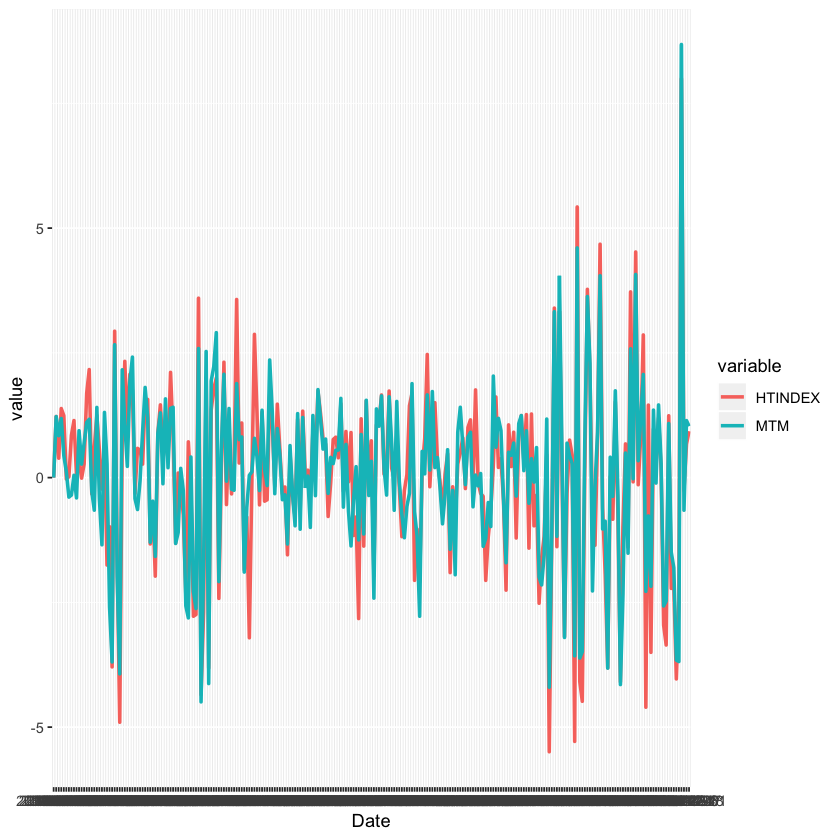

In [23]:
#Graph of HighTechIndex and MTM percent change on date 
data.frame(Date=HighTech$Date,HTINDEX=HighTech$HighTechIndexPC,MTM=HighTech$MTMPC)%>%
reshape2::melt(id.vars = "Date")%>%
ggplot(aes(x=Date,y=value, group = variable, colour = variable))+geom_line(size = 1)

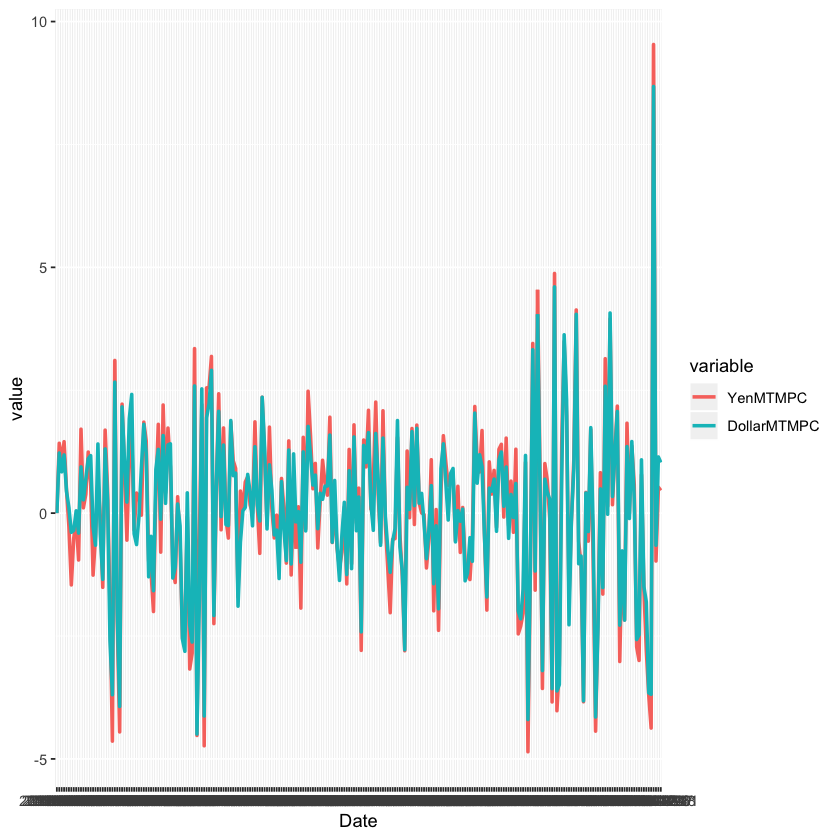

In [24]:
#Graph of MTM percent change in Dollar and Yen on each date 
data.frame(Date=YenDollar_MTM$Date,YenMTMPC=YenDollar_MTM$YenMTMPC,DollarMTMPC=YenDollar_MTM$MTMPC)%>%
reshape2::melt(id.vars = "Date")%>%
ggplot(aes(x=Date,y=value, group = variable, colour = variable))+geom_line(size = 1)

In [25]:
#the for loop runs for all possible interval from 1 to 250 to find the MTM in each case 
MTMAllInterval=c()
Optimal_interval=0
max=0
for(i in 1:250)
    {
    reset()
    DaysIncrementor<<-i
    repeat
    {
        PortfolioRunner(Current_Row,DaysIncrementor,"buying_low")
        MTMAllInterval[i]=MTM
        if(Current_Row>length(StockData$Date))
            {
            break
        }
    }

    print(paste0("For days interval= ",i," The MTM is= ",MTM))
}

[1] "For days interval= 1 The MTM is= 4851851.3022866"
[1] "For days interval= 2 The MTM is= 5181958.27231583"
[1] "For days interval= 3 The MTM is= 4954394.65475663"
[1] "For days interval= 4 The MTM is= 5740964.78837545"
[1] "For days interval= 5 The MTM is= 5376077.23448503"
[1] "For days interval= 6 The MTM is= 4511128.99072897"
[1] "For days interval= 7 The MTM is= 4662535.99360702"
[1] "For days interval= 8 The MTM is= 5787268.60589359"
[1] "For days interval= 9 The MTM is= 5386399.66579195"
[1] "For days interval= 10 The MTM is= 5469838.26745059"
[1] "For days interval= 11 The MTM is= 4939919.93815336"
[1] "For days interval= 12 The MTM is= 4864790.56740555"
[1] "For days interval= 13 The MTM is= 5323714.87679767"
[1] "For days interval= 14 The MTM is= 5676839.79139241"
[1] "For days interval= 15 The MTM is= 5760617.53732617"
[1] "For days interval= 16 The MTM is= 5610182.00960283"
[1] "For days interval= 17 The MTM is= 5346397.19624363"
[1] "For days interval= 18 The MTM is= 55

In [28]:
#MTM at the end of year for all possible interval (from 1 to 250) are stored in ordered set and top 5 optimal days
#are displayed
BestOptimalDay=order(MTMAllInterval, decreasing = TRUE)
print("the optimal days interval that maximizes the MTM are following")
head(BestOptimalDay)

[1] "the optimal days interval that maximizes the MTM are following"


[1]  63  58 188 190 189 186

In [191]:
rm(list = ls())
